# Python_youtube_Analysis-master

# __________________________________________________________

## Importing Required Libraries

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
#importing the datase
df=pd.read_csv(r'C:\Users\sp249\Downloads\video_id_info.csv',on_bad_lines='skip')

C:\Users\sp249\AppData\Local\Temp\ipykernel_160\2384383463.py:2: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r'C:\Users\sp249\Downloads\video_id_info.csv',on_bad_lines='skip')


In [10]:
# Correcting the errors 
df=pd.read_csv(r'C:\Users\sp249\Downloads\video_id_info.csv',on_bad_lines='skip',low_memory=False)

In [11]:
df.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


## Data Cleaning

In [12]:
## lets find out missing values in your data
df.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [13]:
## drop missing values as we have very few & lets update dataframe as well..
df.dropna(inplace=True)

In [14]:
# check now for any missing values
df.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

## #Perform Sentiment Analysis

### Sentiment analysis is a way for computers to understand and analyze the emotions expressed in text, like whether it's positive, negative, or neutral.

#### 1)This video is quite helpful-->Positive sentiment [0,1] more it will close to 1 it will positve sentiment 
#### 2)Uable to understand the topic -->Negative sentiment[-1]
#### 3) I'm attending the lecture this afternoon.-->Neutral sentiment[0]

#### The polarity range refers to the scale used in sentiment analysis to measure the degree of positivity or negativity in text, typically ranging from -1 to 1

In [15]:
#TextBlob is a Python library for processing textual data. It provides a simple API for common natural language processing (NLP) tasks 
!pip install textblob

In [16]:
import sys #It's called "sys" because it provides access to system-specific parameters and functions.
!{sys.executable} -m pip install textblob

In [17]:
from textblob import TextBlob

In [18]:
df.head(6)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0


In [19]:
df.shape

(691374, 4)

In [20]:
# You can create new DataFrame (sample_df) by selecting the first 1000 rows of an existing DataFrame (df).
#This can be useful for working with a smaller subset of data, such as when you want to perform quick analyses or tests without using the entire dataset.

# sample_df = df[0:1000]

In [21]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️") # normal text box

TextBlob("Logan Paul it's yo big day ‼️‼️‼️")

In [22]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment #attribute

Sentiment(polarity=0.0, subjectivity=0.1)

In [23]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment.polarity

0.0

In [24]:
polarity = []

for comment in df['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [25]:
len(polarity)

691374

In [26]:
df['polarity']  = polarity

### Inserting polarity values into comments dataframe while defining feature name as "polarity"

In [27]:
df.head(5)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


## #Wordcloud Analysis of your data

#### Word cloud analysis is a visual representation technique that displays the most frequently occurring words in a text dataset. Word clouds provide a quick and effective way to explore and understand the most frequently occurring words in a dataset. By visualizing the word frequencies, you can identify patterns, trends, and important terms within your data. They allow you to quickly analyze a large volume of text and identify important themes or topics.

## ______________________________________________________________________________________

### Filtering Out Positive and Negative Comments  

In [28]:
# this code filters the original DataFrame to include only the rows with positive polarity (where ‘polarity’ is 1).
filter1 = df['polarity']==1
comments_positive=df[filter1]

In [29]:
filter2 = df['polarity']==-1
comments_negative= df[filter2]

In [30]:
!pip install wordcloud
import sys 
!{sys.executable} -m pip install wordcloud

In [31]:
from wordcloud import WordCloud , STOPWORDS
#Stopwords are common words like "the," "is," and "and" that are often removed from text during analysis because they don't carry significant meaning.

In [32]:
set(STOPWORDS)
#turns the stopwords list into a unique collection of words for faster processing.

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [33]:
df['comment_text']

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691374, dtype: object

In [34]:
type(df['comment_text'])

pandas.core.series.Series

In [35]:
### for wordcloud , we need to frame our 'comment_text' feature into string ..
# joins all the text data from the 'comment_text' column in the DataFrame 'comments_positive' into a single string, separated by spaces.
total_comments_positive = ' '.join(comments_positive['comment_text'])

In [36]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_positive)
#This line of code creates a word cloud from the text data in `total_comments_positive`, using a predefined set of stopwords to filter out common words that don't carry significant meaning.

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

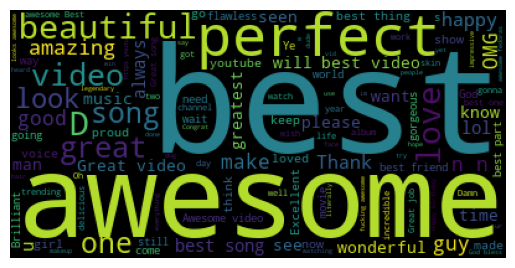

In [37]:
plt.imshow(wordcloud) 
#The imshow() function in matplotlib is used to display images, and in this case, it's used to display the word cloud generated by the WordCloud library. 
plt.axis('off')

### Conclusion-->> positive Users are emphasizing more on best , awesome , perfect , amazing , look , happy etc..

#### same for negative 

In [38]:
total_comments_negative = ' '.join(comments_negative['comment_text'])

In [39]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_negative)

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

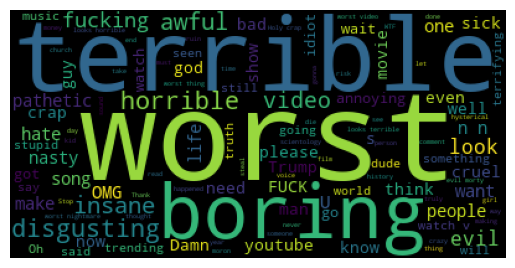

In [40]:
plt.imshow(wordcloud) 
plt.axis('off')

### Conclusion-->> Negative Users are emphasizing more on Terrible , worst ,horrible ,boring , disgusting etc..

##  Perform Emoji's Analysis

In [41]:
!pip install emoji==2.10.1
import sys 
!{sys.executable} -m pip install emoji==2.10.1 

In [42]:
import emoji

In [43]:
emoji.__version__

'2.10.1'

###  Now List down all the emoji's in 'comment_text' Column 

In [44]:
all_emojis_list = []

for comment in df['comment_text'].dropna(): ## in case u have missing values , call dropna()
    for char in comment:
        if char in emoji.EMOJI_DATA:
            all_emojis_list.append(char)

In [45]:
all_emojis_list[0:10]# 1st 10 emojis

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

### Now we have to compute frequencies of each & every emoji in "all_emojis_list"..

In [46]:
from collections import Counter # collection package

In [47]:
Counter(all_emojis_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [48]:
# list of 10 most common occurring emoji's
emojis = [Counter(all_emojis_list).most_common(10)[i][0] for i in range(10)]
emojis

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [49]:
# Frequency of 10 most common occurring emoji's
freqs = [Counter(all_emojis_list).most_common(10)[i][1] for i in range(10)]
freqs

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

### Visually showing the data

In [50]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [51]:
import plotly.io as pio
pio.renderers.default = 'iframe_connected'

In [52]:
import plotly.graph_objs as go
from plotly.offline import iplot  
#use this if your chart is not displaying 
#Plotly is configured to display plots correctly.

In [53]:
trace = go.Bar(x=emojis , y=freqs)

In [54]:
iplot([trace])

### Conclusions : Majority of the customers are happy as most of them are using emojis like: funny , love , heart , outstanding..

## Collect Entire data of Youtube !

In [55]:
import os

In [56]:
files = os.listdir(r'C:\Users\sp249\OneDrive\Desktop\YT-data\YT_additional_data')

In [57]:
files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'README.md',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

In [58]:
# Extracting csv files from the above list 

files_csv = []
for file in files :
    if '.csv' in file :
        files_csv.append(file)

files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [59]:
#while colllecting the data if you encounter any kind of warning its always good to consider a warning modules.

import warnings
from warnings import filterwarnings
filterwarnings('ignore')

### different types of encoding-->>
#### Note : encoding may change depending upon data  , country data , sometimes regional data as well.
#### Fore more inforation on Encoding -- Follow below
#### https://docs.python.org/3/library/codecs.html#standard-encodings

In [64]:
#all the csv file i have to store in big data frame

full_df = pd.DataFrame() # CREATING A EMPTY DATAFRAME
path = r'C:\Users\sp249\OneDrive\Desktop\YT-data\YT_additional_data'
for file in files_csv:
    current_df = pd.read_csv(path+'/'+file,encoding = 'iso-8859-1')
    full_df = pd.concat([full_df,current_df] , ignore_index = True) #  ensures that the resulting DataFrame has continuous integer index values.

In [63]:
full_df.shape

(375942, 16)

### Data Cleaning 

#### 1. Check for duplicates

In [65]:
full_df.duplicated()  #True will represent the duplicate rows and  False represent the uniques rows.

0         False
1         False
2         False
3         False
4         False
          ...  
375937     True
375938    False
375939    False
375940    False
375941    False
Length: 375942, dtype: bool

#### 2. Selecting Duplicate Rows and Computing Shape

In [93]:
full_df[full_df.duplicated()].shape  # data frame of all the duplicate rows 

(0, 16)

#### 3. Removing Duplicates

In [67]:
full_df = full_df.drop_duplicates()

In [68]:
full_df.shape

(339525, 16)

#### 4. Storing Data
#####  Storing data into csv and json

In [94]:
output_dir = r'C:\Users\sp249\OneDrive\Desktop\YT-data\export_data'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the DataFrame to CSV and json
full_df[0:1000].to_csv(os.path.join(output_dir, 'youtube_sample.csv'), index=False)
full_df[0:1000].to_json(os.path.join(output_dir, 'youtube_sample.json'), index=False)

## Data Examining

In [81]:
full_df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...


### 1. Giving category name to every unique category id 

In [82]:
full_df['category_id'].unique() #returns an array containing the unique values of the category_id

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44])

In [95]:
## lets read json file .. title for our category id is present in this json file , lets extract it .
json_df = pd.read_json(r'C:\Users\sp249\OneDrive\Desktop\YT-data\YT_additional_data/US_category_id.json')

In [88]:
json_df

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
5,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
6,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
7,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
8,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
9,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [89]:
json_df['items'][0]
### retrieves the first item (index 0) from the 'items' column of the DataFrame

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

#### a. Connecting id and title from 'items' col 

In [90]:
#now i want id and title in a dictionary  
cat_dict = {}

for item in json_df['items'].values:   #values here return the array representation 
    ## cat_dict[key] = value (Syntax to insert key:value in dictionary)
    cat_dict[int(item['id'])] = item['snippet']['title']    # snippet here is the sub dict so we have to write this way  ['snippet']['title']

In [91]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

#### b. Mapping category id to category_name by using cat_dict 

In [96]:
full_df['category_name'] = full_df['category_id'].map(cat_dict)
full_df['category_name']
#maps category IDs in the 'category_id' column of full_df DataFrame to their corresponding category titles using the cat_dict dictionary.

0                    Music
1                   Comedy
2                   Comedy
3            Entertainment
4                    Music
                ...       
375936      People & Blogs
375938      People & Blogs
375939       Entertainment
375940    Film & Animation
375941              Gaming
Name: category_name, Length: 339525, dtype: object

In [97]:
full_df.head(4) #now you can notice that you have a new feature which is a category name 

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment


### 1. which category has the maximum likes ?

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Music'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Entertainment'),
  Text(3, 0, 'News & Politics'),
  Text(4, 0, 'People & Blogs'),
  Text(5, 0, 'Howto & Style'),
  Text(6, 0, 'Film & Animation'),
  Text(7, 0, 'Science & Technology'),
  Text(8, 0, 'Gaming'),
  Text(9, 0, 'Sports'),
  Text(10, 0, 'Nonprofits & Activism'),
  Text(11, 0, 'Pets & Animals'),
  Text(12, 0, 'Travel & Events'),
  Text(13, 0, 'Autos & Vehicles'),
  Text(14, 0, 'Education'),
  Text(15, 0, 'Shows'),
  Text(16, 0, 'Movies'),
  Text(17, 0, 'Trailers')])

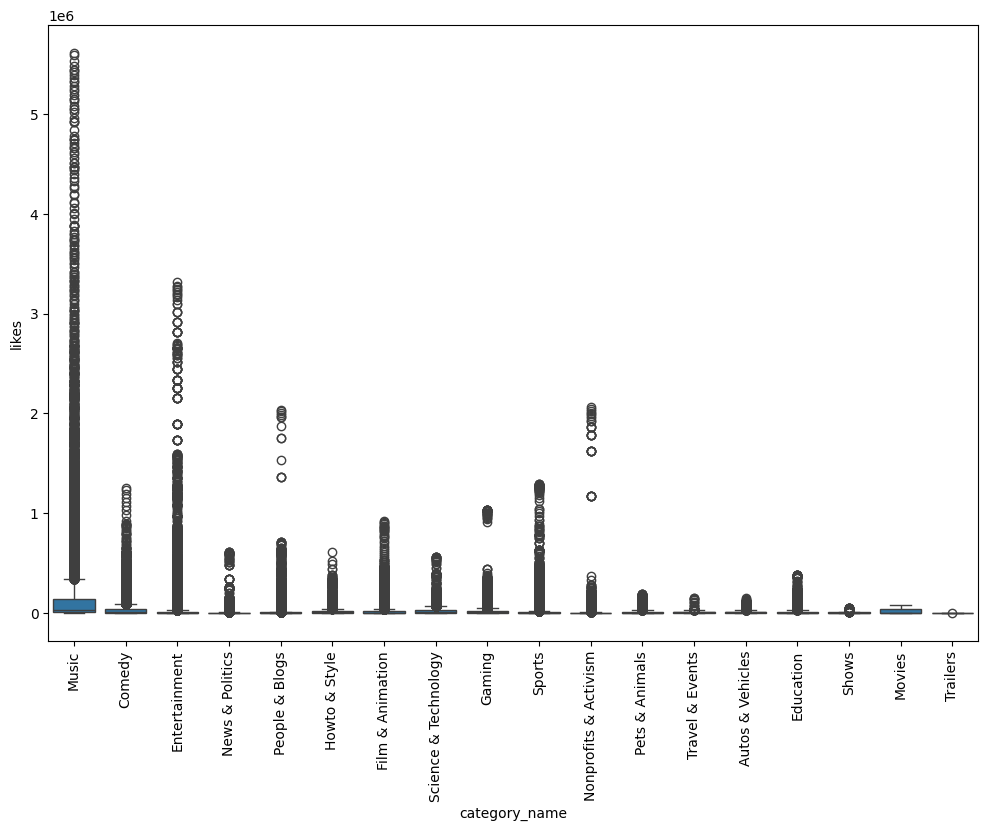

In [99]:
plt.figure(figsize=(12,8))#Creates a new figure with a specified size of 12 inches by 8 inches for better visualization.
sns.boxplot(x='category_name' , y='likes' , data=full_df)
plt.xticks(rotation='vertical')#Rotates the x-axis labels vertically for better readability.

### 2. Find out whether audience is engaged or not
#### ---> like rate ,dislike , comment_count_rate

#### a. Finding the percentages of likes,dislikes and comments as per views 

In [101]:
full_df['like_rate'] = (full_df['likes']/full_df['views'])*100
full_df['dislike_rate'] = (full_df['dislikes']/full_df['views'])*100
full_df['comment_count_rate'] = (full_df['comment_count']/full_df['views'])*100

In [102]:
full_df.columns # three things added 'like_rate','dislike_rate', 'comment_count_rate'

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

#### b. creating box plot for like rate

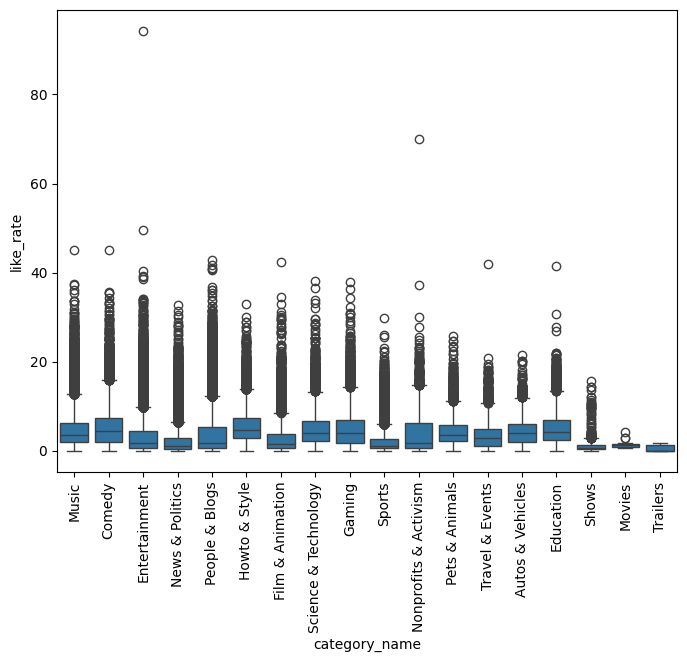

In [103]:
plt.figure(figsize=(8,6))
sns.boxplot(x='category_name' , y='like_rate' , data=full_df)
plt.xticks(rotation='vertical')
plt.show()

### 3. Analysing relationship between views & likes

<Axes: xlabel='views', ylabel='likes'>

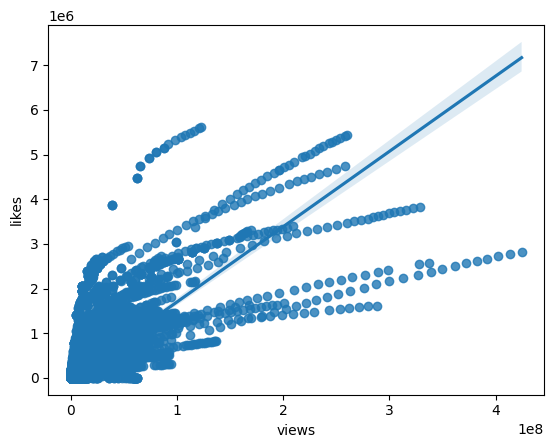

In [104]:
#using Regression plot
#regression plot is nothing but it is the combination of a scatter plot + a regression kine on top of that
sns.regplot(x='views' , y='likes' , data = full_df)

#### ---> it seems that there is straight line it means views will increase my like will also increase in a same way.
#### its is concept of correlation

### 4. Representing correlation between views , likes , dislikes

In [105]:
full_df[['views', 'likes', 'dislikes']]

,views,likes,dislikes
0,17158579,787425,43420
1,1014651,127794,1688
2,3191434,146035,5339
3,2095828,132239,1989
4,33523622,1634130,21082
...,...,...,...
375936,8259128,645888,4052
375938,1064798,60008,382
375939,1066451,48068,1032
375940,5660813,192957,2846


In [106]:
full_df[['views', 'likes', 'dislikes']].corr() ### finding co-relation values between ['views', 'likes', 'dislikes']

,views,likes,dislikes
views,1.000000,0.779531,0.405428
likes,0.779531,1.000000,0.451809
dislikes,0.405428,0.451809,1.000000


<Axes: >

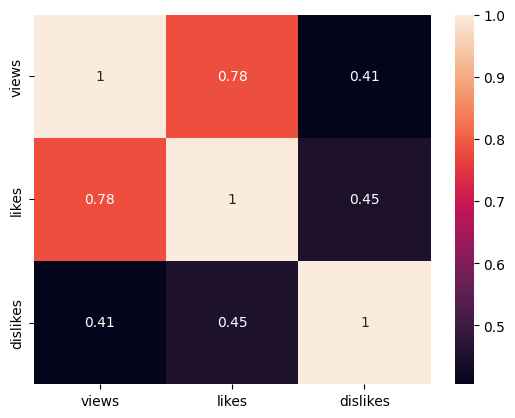

In [108]:
# Now if you want to showcase this correlation table in a visualized way , you can use the heatmap
sns.heatmap(full_df[['views', 'likes', 'dislikes']].corr() , annot=True) 
#When annot=True, numerical values are displayed on the heatmap cells

### 5.Which channels have the largest number of trending videos?

In [109]:
full_df.head(6)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,dislike_rate,comment_count_rate
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music,4.589104,0.253051,0.733639
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy,12.594873,0.166363,1.284185
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy,4.575843,0.167292,0.256342
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,6.309630,0.094903,0.835851
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music,4.874563,0.062887,0.253752
5,0yIWz1XEeyc,17.14.11,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,25,2017-11-13T07:37:51.000Z,"#DramaAlert|""Drama""|""Alert""|""DramaAlert""|""keem...",1309699,103755,4613,12143,https://i.ytimg.com/vi/0yIWz1XEeyc/default.jpg,False,False,False,âº Follow for News! - https://twitter.com/KEE...,News & Politics,7.922049,0.352218,0.927160


In [110]:
full_df['channel_title'].value_counts() 
# returns the count of unique values in a Series, providing a frequency distribution of the values.

channel_title
The Late Show with Stephen Colbert    710
WWE                                   643
Late Night with Seth Meyers           592
TheEllenShow                          555
Jimmy Kimmel Live                     528
                                     ... 
æµ·å¤ã®åå¿ï¼ LOVE JAPAN           1
ã­ãã¦ãé
ä¿¡å¢                   1
ãã£ã³ãã« T.M                     1
FBas                                    1
Owen Harvey                             1
Name: count, Length: 37824, dtype: int64

In [111]:
### lets obtain above frequency table using groupby approach : 
full_df.groupby(['channel_title']).size()

channel_title
! ì¸ìì ë¬´ì¨ì¼ì´                   7
!!8æã ãé¢ç½ãã¿å¤§éå          1
!BTSã»TWICE ã¾ã¨ã                     1
!Los amorosos ViralesÂ¡                    2
!t Live                                    3
                                          ..
ï¼åã§ã§ãã DIY                     5
ï¼¢ï¼¡ï¼³ï¼¨ï½ï½                         2
ï¼«ã®ãã£ãã·ã³ã°ã¡ããã­ã    1
ï¼·ï¼¡ï¼ªï¼¯ï¼©ï¼«ï¼¡                      2
ðSandrea                                2
Length: 37824, dtype: int64

In [112]:
cdf = full_df.groupby(['channel_title']).size().sort_values(ascending=False).reset_index() 


#reset_index() is a pandas DataFrame method used to reset the index of a DataFrame. 
#It converts the index labels into a new column and assigns a default numeric index to the DataFrame.

In [113]:
cdf

,channel_title,0
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Juste Pour Jouer,1
37820,JusteJo,1
37821,Justie,1
37822,#kaneki ken,1


In [114]:
cdf = cdf.rename(columns={0:'total_videos'})

In [115]:
cdf

,channel_title,total_videos
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Juste Pour Jouer,1
37820,JusteJo,1
37821,Justie,1
37822,#kaneki ken,1


In [116]:
import plotly.express as px

In [117]:
px.bar(data_frame=cdf[0:20] , x='channel_title' , y='total_videos')

##  Which channels have the largest number of trending videos?

#### Like this we can do many more things with the data provided

## CONCLUSION :

### The analysis of YouTube data reveals significant trends in user sentiment and engagement. Positive comments frequently highlight words like 


### "awesome" and "perfect," while negative feedback focuses on terms like "terrible" and "boring." Emoji analysis shows that most users express   

### positive emotions, with frequent use of emojis like hearts and smiles. The correlation between views and likes indicates that higher views often 

 ###  result in more likes. Overall, the findings emphasize the factors driving content popularity and user satisfaction on YouTube. 

# ___________________________________________________________________________________